## Final TP Method

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

1
3
5
7
[[1, 119], [3, 106], [5, 98], [7, 82]]
Cut off for gaussian blurring is: 3 x 3
Number of points for 1 x 1 kernel:  119
Number of points for 3 x 3 kernel:  106
Number of points for 5 x 5 kernel:  98
Number of points for 7 x 7 kernel:  82


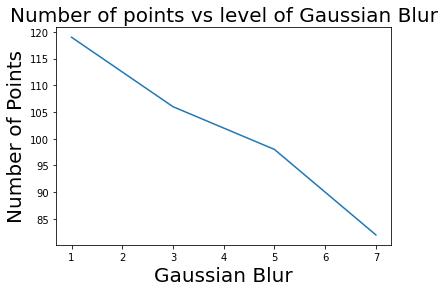

index: 1


In [1]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
img = cv.imread("Sample.jpg",0)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
Ref_list = []
number_of_points = []
contourcount = []
contourcompiled = []
def splitListOfTuples(lst):                                                                # Definition for splitting Centroid Information
    X_Centroid = []                        
    Y_Centroid = []
    for x, y in lst:
        X_Centroid.append(x)
        Y_Centroid.append(y)
    return (X_Centroid, Y_Centroid)
for k in range (1,9,2):                                                                    # for loop for different gaussian blur kernel sizes
    items=[]
    Compiled_Values=[]
    Compiled_Interior_Points = []
    List = []    
    for i in range (0,255):                                                                # loop for all thresholds
        Blurred_Image = cv.GaussianBlur(img,(k,k),cv.BORDER_DEFAULT)                       # gaussian filter
        clean = cv.fastNlMeansDenoising(Blurred_Image)                                     # cleaning
        closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                           # closing
        opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)  
        ret,Thresholded_Image = cv.threshold(opening,255-i,255,cv.THRESH_BINARY)           # Global Thresholding
        items = cv.findContours(Thresholded_Image,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)     # Contour Extraction
        Contours = imutils.grab_contours(items)
        for c in Contours:
            
            M = cv.moments(c)
            cX = int(M["m10"] / M["m00"])                                                  # Mid Point Extraction
            cY = int(M["m01"] / M["m00"]) 
            area = cv.contourArea(c)                                                       # Area Extraction
            if area>200:               
                if len(Compiled_Values)==0:                                                # if compilation length is 0, append current peak information
                    Contour_Information=[255-i, [cX,cY], area]
                    Compiled_Values.append(Contour_Information)                            # to append [current height, mid point, area data]
                elif len(Compiled_Values) !=0:                                             # if current archive has more than 0 peaks recorded,
                                                                                           # check if current contour contains any recorded pts
                    for j in range(0, len(Compiled_Values)):
                        dist = cv.pointPolygonTest(c,(Compiled_Values[j][1][0],Compiled_Values[j][1][1]),True) 
                                                                                           # check if the mid points lie in contour
                        if dist>0:                                                         # if mid point within current contour, append to new list
                                                                                           # to group all the mid points within a cluster
                            Points_in_Contour=[Compiled_Values[j],area]
                            Compiled_Interior_Points.append(Points_in_Contour)                                   
                            List.append(Points_in_Contour[0][0]) 
                            Highest_Point=max(List)                                        # to denote highest peak within contour            
                    if len(Compiled_Interior_Points)>1:                                    # if there is more than one peak within cluster, adjust
                                                                                           # height of lower peaks with their prominence values
                        for l in range (0,len(Compiled_Interior_Points)):                  # code for prominence adjustment
                            if Compiled_Interior_Points[l][0][0] != Highest_Point:
                                ProminenceValue= Compiled_Interior_Points[l][0][0] - 255+i
                                Contour_Information=[Compiled_Interior_Points[l][0][0], Compiled_Interior_Points[l][0][1], Compiled_Interior_Points[l][0][2], ProminenceValue]
                                Compiled_Values.remove(Compiled_Interior_Points[l][0])
                                Compiled_Values.append(Contour_Information)
                        Compiled_Interior_Points = []    
                    elif len(Compiled_Interior_Points)==1:                                 # if there is only one peak within that contour, adjust area
                        Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                        Compiled_Values.remove(Compiled_Interior_Points[0][0])
                        Compiled_Values.append(Contour_Information)  
                    else:                                                                  # if there is no recorded peak within the current cluster, it is a new peak                                                                                       
                        Contour_Information=[255-i, [cX,cY], area]                         # append to compilation
                        Compiled_Values.append(Contour_Information)
                    Compiled_Interior_Points = [] 
    for i in range(0,len(Compiled_Values)):                                                # code to update height with Prominence Value
        if len(Compiled_Values[i]) == 4:
            Compiled_Values[i][0] = Compiled_Values[i][3]
            Compiled_Values[i].pop()
    Unique_Centroids=[]
    
    for i in range(0,len(Compiled_Values)):                                                # Removing Duplicates
        if Compiled_Values[i][1] not in Unique_Centroids:
            Unique_Centroids.append(Compiled_Values[i][1])   
    x,y=splitListOfTuples(Unique_Centroids)
    Check = []                                                
    Areavalue=[]
    LargestValue1=[]
    n=0
    while n <len(x): 
        for i in range(0,len(Compiled_Values)):
            if Compiled_Values[i][1][0] ==x[n] and Compiled_Values[i][1][1] == y[n] :
                Check.append(Compiled_Values[i])
                Areavalue.append(Compiled_Values[i][2])
                maximum=max(Areavalue)
        index=Areavalue.index(maximum)
        LargestValue1.append(Check[index])
        n=n+1
        Check = [] 
        Areavalue=[]
        maximum=0
    Overall_list = []  
    for i in range(0,len(LargestValue1)):
        Overall_list.append([LargestValue1[i][0],LargestValue1[i][1],LargestValue1[i][2]])

    Refined_list = []                                                                      # Compilation of Refined List with unique centroids
    for i in Overall_list:    
        Refined_list.append(i)
    number_of_points.append([k, len(Refined_list)])
    Ref_list.append(Refined_list)
    print(k)
print(number_of_points)                                                                   # number of NP detected per kernel size counted
gradients = []                                                                            # to determine the cut off for gaussian filtering, find the gradient first
difference = []
for i in range(0, len(number_of_points)-1):
    gradient = (number_of_points[i+1][1] - number_of_points[i][1])/(number_of_points[i+1][0] - number_of_points[i][0]) 
    gradients.append(gradient)
for i in range(0, len(gradients)-1):
    differences = gradients[i+1] - gradients[i]
    difference.append(differences)
maxvalue = max(difference)                                                                # maximium change in gradient to detect necking point in plot
index = difference.index(maxvalue)
l = number_of_points[index + 1][0]
print("Cut off for gaussian blurring is:", l ,"x", l)                                     # printing cut off (necking point) and the number of points per kernel size
print("Number of points for 1 x 1 kernel: ", number_of_points[0][1])
print("Number of points for 3 x 3 kernel: ", number_of_points[1][1])
print("Number of points for 5 x 5 kernel: ", number_of_points[2][1])
print("Number of points for 7 x 7 kernel: ", number_of_points[3][1])                      
x,y=splitListOfTuples(number_of_points)
plt.plot(x, y)
plt.title('Number of points vs level of Gaussian Blur',fontsize=20)
plt.xlabel('Gaussian Blur',fontsize=20)
plt.ylabel('Number of Points',fontsize=20)
plt.show()

g = [number_of_points[index + 1][0], number_of_points[index + 1][1]]                     # plotting of graph to show point of necking
index = number_of_points.index(g)
print("index:",index)

Prominence_Values=[]
for i in range(0,len(Ref_list[index])):
    Prominence_Values.append(Ref_list[index][i][0])

C:\Users\tohct\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


First minimum point: 147.32647628444616
Second maximum point: 186.59585011369313


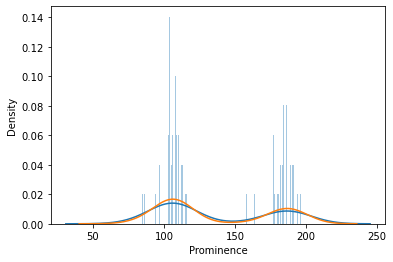

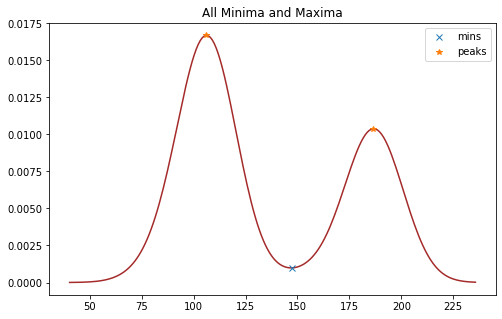

In [2]:
from matplotlib import pyplot as plt                                                     # Code to determine prominence cut off
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
df= pd.DataFrame()
df['Prominence'] = Prominence_Values
sns.distplot(df.Prominence, bins = 255)
k = sns.kdeplot(df.Prominence, bw_adjust=0.8).get_lines()[1].get_data()
i = np.argmin(k[1])
x_min = k[0][i]
y_min = k[1][i]
series = k[1]
mins, _ =find_peaks(series*-1)
peaks, _ = find_peaks(series)


fig, ((ax0))= plt.subplots(nrows=1, ncols=1, figsize=(8,5))                             
ax0.plot(k[0], series, color='brown');
ax0.plot(k[0][mins], series[mins], 'x', label='mins')
ax0.plot(k[0][peaks], series[peaks], '*', label='peaks')
ax0.set_title('All Minima and Maxima')
ax0.legend()
print("First minimum point:", k[0][mins][0])
#print("Second minimum point:", k[0][mins][1])
#print("Third minimum point:", k[0][mins][2])
#print("First maximum point:", k[0][peaks][0])
print("Second maximum point:", k[0][peaks][1])



In [3]:
b = int(input("Which minimum point?: "))                                                # code to request for user input to decide which peak should be removed
e=round(k[0][mins][b-1])
print("Threshold for prominence:" , e)

Which minimum point?: 1
Threshold for prominence: 147


Number of NP detected:  40


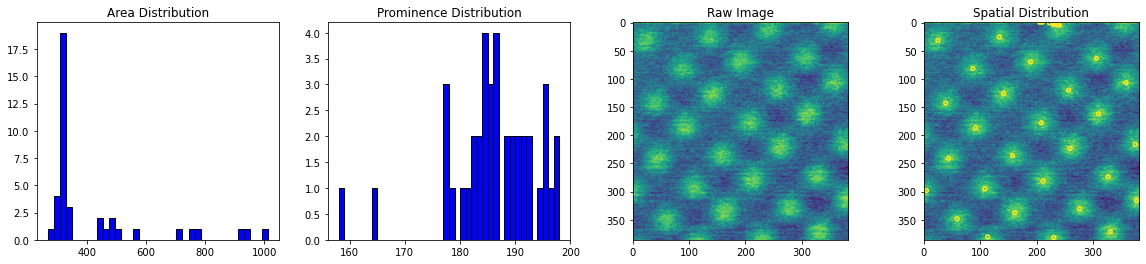

In [4]:
g = number_of_points[index ][0]
img = cv.imread("Sample.jpg",0)                                             # algorithm with optimised parameters
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
items=[]
Compiled_Values=[]
Compiled_Interior_Points = []
List = []
for i in range (0,255):                                                                # Image Preprocessing Steps
    dst = cv.GaussianBlur(img,(g,g),cv.BORDER_DEFAULT)                                 # Gaussian filtering
    clean = cv.fastNlMeansDenoising(dst)
    closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                           # Closing
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)  
    ret,th = cv.threshold(opening,255-i,255,cv.THRESH_BINARY)                          # Global Thresholding
    items = cv.findContours(th,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)                    # Contour Extraction
    Contours = imutils.grab_contours(items) 
    for c in Contours:
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])                                                  # Centroid Extraction  
        cY = int(M["m01"] / M["m00"])
        area = cv.contourArea(c)                                                       # Area Extraction
        if area>200:
            if len(Compiled_Values)==0:                                                # if compilation length is 0, append current peak information
                Contour_Information=[255-i, [cX,cY], area]                             # to append [current height, mid point, area data]
                Compiled_Values.append(Contour_Information)   
            elif len(Compiled_Values) !=0:                                             # if current archive has more than 0 peaks recorded,
                for j in range(0, len(Compiled_Values)):                               # check if current contour contains any recorded pts
                    dist = cv.pointPolygonTest(c,(Compiled_Values[j][1][0],Compiled_Values[j][1][1]),True)
                    if dist>0:                                                         # check if the mid points lie in contour
                        Points_in_Contour=[Compiled_Values[j],area]                    # if mid point within current contour, append to new list
                        Compiled_Interior_Points.append(Points_in_Contour)             # to group all the mid points within a cluster                                 
                        List.append(Points_in_Contour[0][0])                           # for the highest midpoint  
                        Highest_Point=max(List)                                        # to denote highest peak within contour               
                if len(Compiled_Interior_Points)>1:                                    # if there is more than one peak within cluster, adjust height with prominence values
                    for l in range (0,len(Compiled_Interior_Points)):                  # code for prominence adjustment
                        if Compiled_Interior_Points[l][0][0] != Highest_Point:        
                            ProminenceValue= Compiled_Interior_Points[l][0][0] - 255+i
                            Contour_Information=[Compiled_Interior_Points[l][0][0], Compiled_Interior_Points[l][0][1], Compiled_Interior_Points[l][0][2], ProminenceValue]
                            Compiled_Values.remove(Compiled_Interior_Points[l][0])
                            Compiled_Values.append(Contour_Information)
                    Compiled_Interior_Points = []                          
                elif len(Compiled_Interior_Points)==1:                                 # if there is only one peak within that contour, adjust area if the difference in height 
                    if len(Compiled_Interior_Points[0])==3:                            # the Prominence Value has not been updated
                        PV = abs(Compiled_Interior_Points[0][0][0] - 255+i)            # code for updating prominence value
                        if PV <= e:                                                    # if difference is less than cut off, adjust area
                            Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                            Compiled_Values.remove(Compiled_Interior_Points[0][0])
                            Compiled_Values.append(Contour_Information)
                    else:                                                              # if Prominence Value has been updated
                        PV = abs(Compiled_Interior_Points[0][1] - 255+i)               # check if the vale is prominent enough 
                        if PV <= e:                                                    # if difference is less than cut off, adjust area
                            Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                            Compiled_Values.remove(Compiled_Interior_Points[0][0])
                            Compiled_Values.append(Contour_Information)
                else:
                    Contour_Information=[255-i, [cX,cY], area]                         # else it is a new point and is to be appended under compilation
                    Compiled_Values.append(Contour_Information)
                Compiled_Interior_Points = []  
                
                
for i in range(0,len(Compiled_Values)):                                                # code to update height with Prominence Value
    if len(Compiled_Values[i]) == 4:
        Compiled_Values[i][0] = Compiled_Values[i][3]
        Compiled_Values[i].pop()
def splitListOfTuples(lst):
    X_Centroid = []
    Y_Centroid = []
    for x, y in lst:
        X_Centroid.append(x)
        Y_Centroid.append(y)
    return (X_Centroid, Y_Centroid)
Unique_Centroids=[]                                                                    # Removing Duplicates
for i in range(0,len(Compiled_Values)):
    if Compiled_Values[i][1] not in Unique_Centroids:
        Unique_Centroids.append(Compiled_Values[i][1])    
x,y=splitListOfTuples(Unique_Centroids)
Check = [] 
Areavalue=[]
LargestValue1=[]
n=0
while n <len(x):                                                                       # Compilation of Refined List with unique centroids
    for i in range(0,len(Compiled_Values)):
        if Compiled_Values[i][1][0] ==x[n] and Compiled_Values[i][1][1] == y[n] :
            Check.append(Compiled_Values[i])
            Areavalue.append(Compiled_Values[i][2])
            maximum=max(Areavalue)
    index=Areavalue.index(maximum)
    LargestValue1.append(Check[index])
    n=n+1
    Check = [] 
    Areavalue=[]
    maximum=0
Overall_list = []  
for i in range(0,len(LargestValue1)):
    Overall_list.append([LargestValue1[i][0],LargestValue1[i][1],LargestValue1[i][2]])
Refined_list = []            
Midpoint_list = [] 
for i in Overall_list:
    if i[0] >= e:
        Refined_list.append(i)
        Midpoint_list.append(i[1])
Area_TP=[]
for i in range(0,len(Refined_list)):
    Area_TP.append(Refined_list[i][2])
Prominence_Values=[]
for i in range(0,len(Refined_list)):
    Prominence_Values.append(Refined_list[i][0])  
    
img = cv.imread('Sample.jpg',0)                                             # Plotting of spatial distributions 
img2 = cv.imread('Sample.jpg',0)
#plotting of centroids of the maximum areas to check for logic
#img = cv.imread('MN.jpg',0)
centroids=Midpoint_list
canvas = img2
CIRCLE_RADIUS = 3
CIRCLE_THICKNESS = 2
COLOR_RED = np.array([0, 0, 255])
n==0
for c in centroids:
        o_c = (int(c[0]), int(c[1]))
        cv.circle(img2, o_c, CIRCLE_RADIUS, (255, 255, 255), CIRCLE_THICKNESS)

fig, ((ax0, ax1,ax2,ax3))= plt.subplots(nrows=1, ncols=4, figsize=(20,4))
ax0.hist(Area_TP, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax0.set_title('Area Distribution')
ax1.hist(Prominence_Values, color = 'blue', edgecolor = 'black',
         bins = len(Prominence_Values))
ax1.set_title('Prominence Distribution')
ax2.imshow(img)
ax2.set_title('Raw Image')
ax3.imshow(img2)
ax3.set_title('Spatial Distribution')
print("Number of NP detected: ", len(Refined_list))
plt.show()                                                                                    # Obtaining Sample Statistics
s = 0
for i in Area_TP: 
    s=s+i
mean_TP = s / len(Area_TP)
t = 0
for i in Area_TP:
    t= t+ (i-mean_TP)**2
std_TP = np.sqrt(t /len(Area_TP))

In [5]:
mean_TP

424.325

In [6]:
std_TP

196.18169352668968